## Python Libraries

In [9]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings("ignore")

## Read and Analyse Data

In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [12]:
# read data 
df = pd.read_csv("NY-House-Dataset.csv")

In [13]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [15]:
df.tail()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.0,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.0,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.0,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.0,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752
4800,Brokered by Nyc Realty Brokers Llc,Co-op for sale,349000,1,1.0,750.000000,460 Neptune Ave Apt 14O,"Brooklyn, NY 11224","460 Neptune Ave Apt 14OBrooklyn, NY 11224",New York,Kings County,Brooklyn,Coney Island,460,"460 Neptune Ave #14a, Brooklyn, NY 11224, USA",40.579147,-73.970949


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE,4801.0,2.356940e+06,3.135525e+07,2494.000000,499000.000000,825000.000000,1.495000e+06,2.147484e+09
BEDS,4801.0,3.356801e+00,2.602315e+00,1.000000,2.000000,3.000000,4.000000e+00,5.000000e+01
BATH,4801.0,2.373861e+00,1.946962e+00,0.000000,1.000000,2.000000,3.000000e+00,5.000000e+01
PROPERTYSQFT,4801.0,2.184208e+03,2.377141e+03,230.000000,1200.000000,2184.207862,2.184208e+03,6.553500e+04
LATITUDE,4801.0,4.071423e+01,8.767557e-02,40.499546,40.639375,40.726749,4.077192e+01,4.091273e+01
LONGITUDE,4801.0,-7.394160e+01,1.010825e-01,-74.253033,-73.987143,-73.949189,-7.387064e+01,-7.370245e+01


## Missing Value Analysis

In [17]:
df.isnull().sum().sum()

0

In [18]:
df.isnull().values.any()

False

## Data Visualization

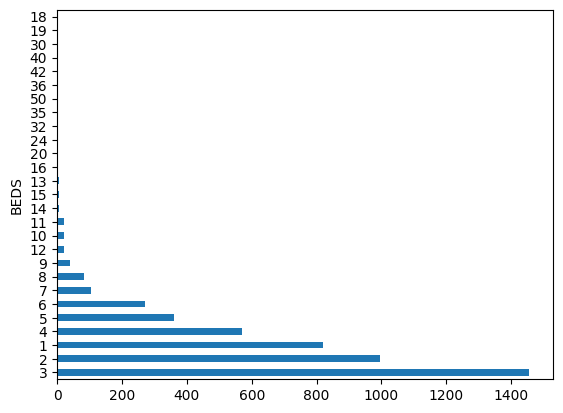

In [19]:
df["BEDS"].value_counts().plot.barh();

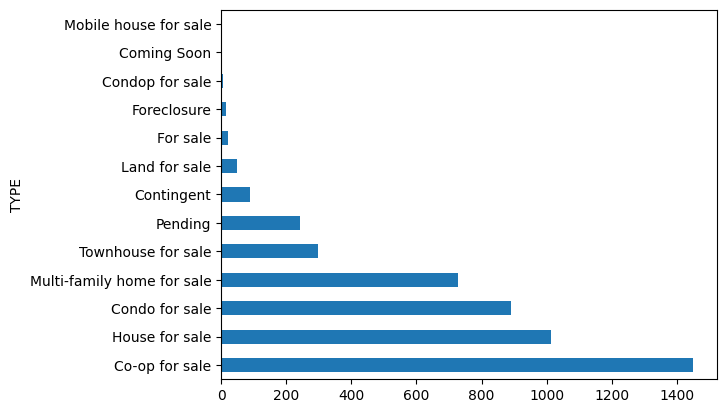

In [20]:
df["TYPE"].value_counts().plot.barh();

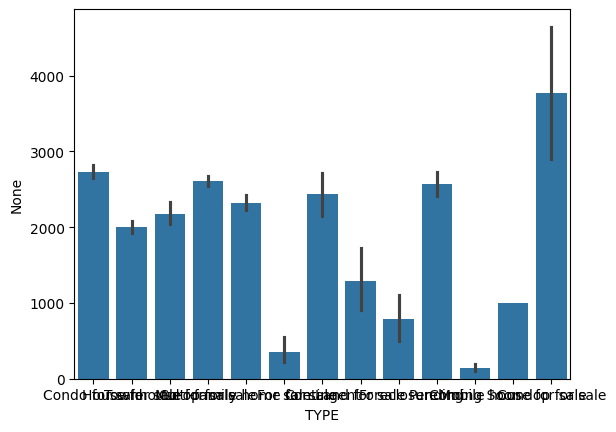

In [21]:
sns.barplot(x = "TYPE", y = df.TYPE.index, data= df);

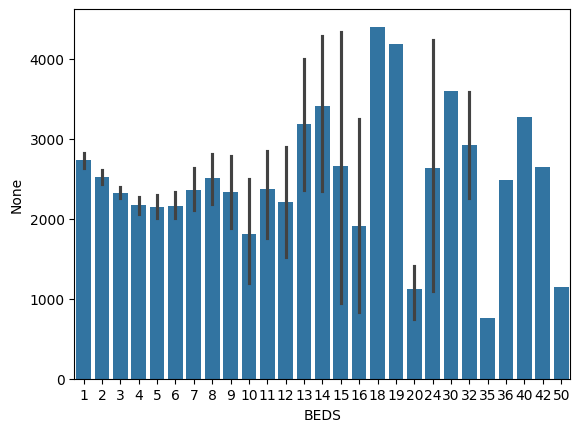

In [22]:
sns.barplot(x = "BEDS", y = df.BEDS.index, data= df);

<Axes: xlabel='TYPE', ylabel='BEDS'>

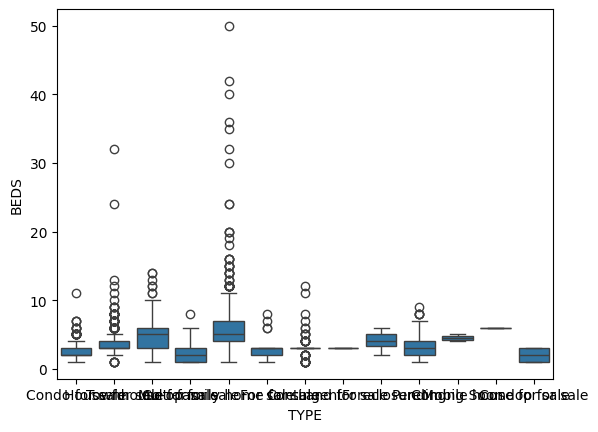

In [23]:
sns.boxplot(x="TYPE", y="BEDS", data=df)

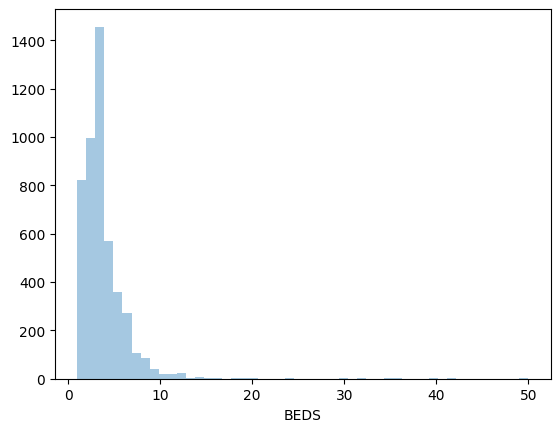

In [24]:
sns.distplot(df.BEDS, kde = False);

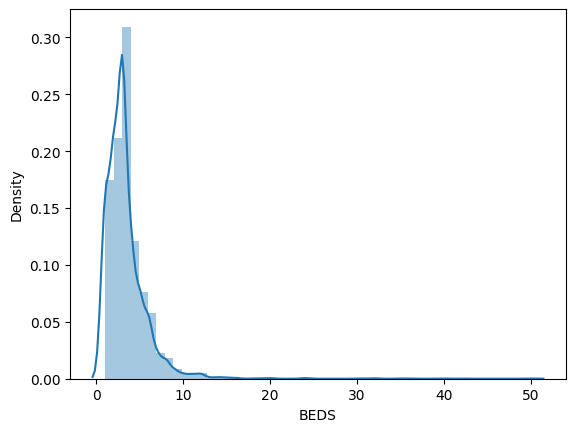

In [25]:
sns.distplot(df.BEDS);

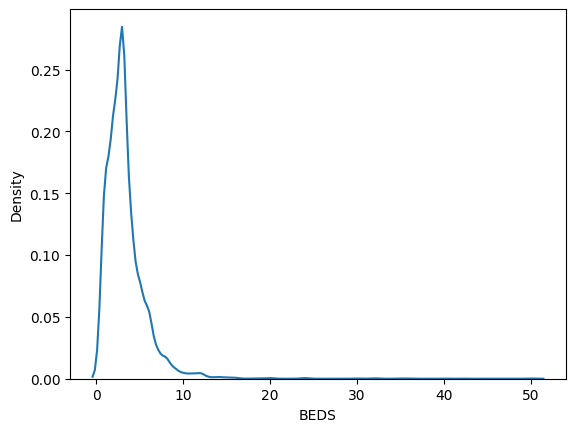

In [26]:
sns.distplot(df.BEDS, hist = False);

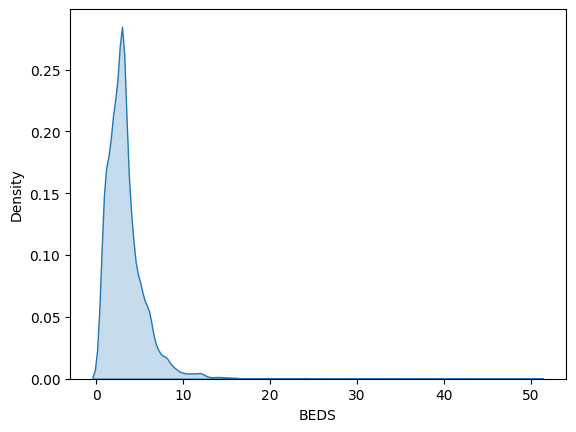

In [27]:
sns.kdeplot(df.BEDS, shade = True);

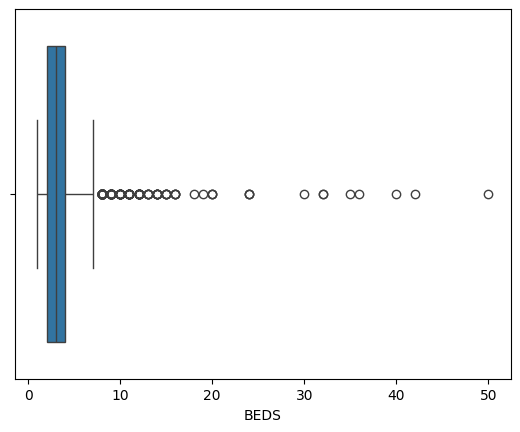

In [28]:
sns.boxplot(x = df["BEDS"]);

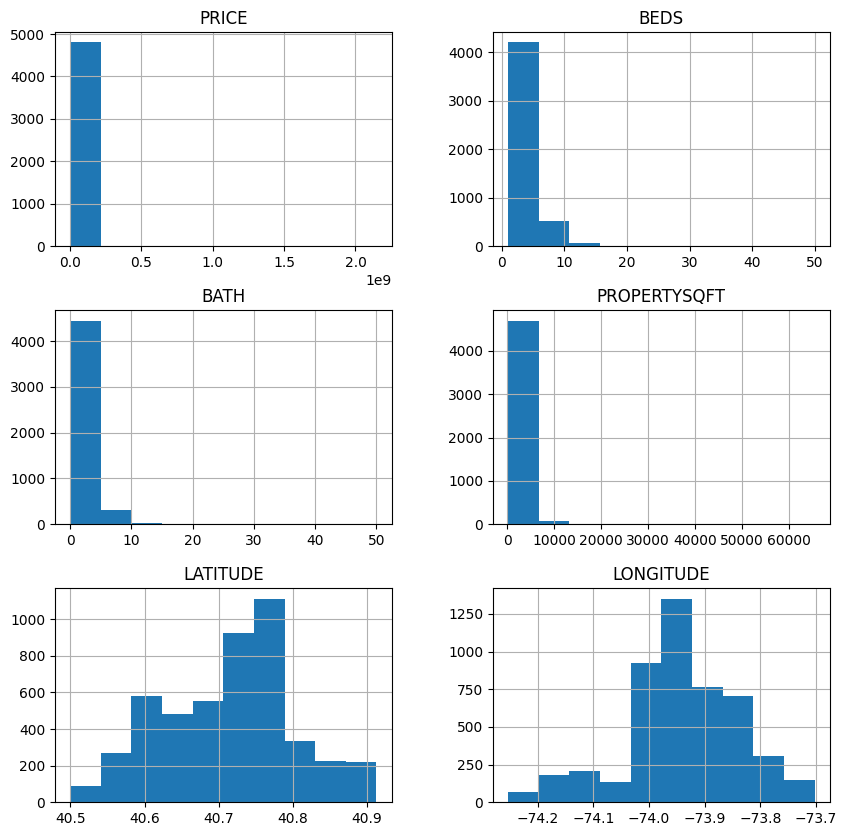

In [29]:
df.hist(figsize = (10,10));

## Data Preprocessing

In [30]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [31]:
df.columns

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [32]:
df_num = df.select_dtypes(include = ["float64", "int64"])

In [33]:
df_num.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
0,315000,2,2.000000,1400.0,40.761255,-73.974483
1,195000000,7,10.000000,17545.0,40.766393,-73.980991
2,260000,4,2.000000,2015.0,40.541805,-74.196109
3,69000,3,1.000000,445.0,40.761398,-73.974613
4,55000000,7,2.373861,14175.0,40.767224,-73.969856


In [34]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE,4801.0,2.356940e+06,3.135525e+07,2494.000000,499000.000000,825000.000000,1.495000e+06,2.147484e+09
BEDS,4801.0,3.356801e+00,2.602315e+00,1.000000,2.000000,3.000000,4.000000e+00,5.000000e+01
BATH,4801.0,2.373861e+00,1.946962e+00,0.000000,1.000000,2.000000,3.000000e+00,5.000000e+01
PROPERTYSQFT,4801.0,2.184208e+03,2.377141e+03,230.000000,1200.000000,2184.207862,2.184208e+03,6.553500e+04
LATITUDE,4801.0,4.071423e+01,8.767557e-02,40.499546,40.639375,40.726749,4.077192e+01,4.091273e+01
LONGITUDE,4801.0,-7.394160e+01,1.010825e-01,-74.253033,-73.987143,-73.949189,-7.387064e+01,-7.370245e+01


In [35]:
df_num["PRICE"].describe()

count    4.801000e+03
mean     2.356940e+06
std      3.135525e+07
min      2.494000e+03
25%      4.990000e+05
50%      8.250000e+05
75%      1.495000e+06
max      2.147484e+09
Name: PRICE, dtype: float64

In [36]:
df_num["LONGITUDE"].describe()

count    4801.000000
mean      -73.941601
std         0.101082
min       -74.253033
25%       -73.987143
50%       -73.949189
75%       -73.870638
max       -73.702450
Name: LONGITUDE, dtype: float64

In [37]:
print("Mean: " + str(df_num["PRICE"].mean()))
print("Count: " + str(df_num["PRICE"].count())) 
print("Max: " + str(df_num["PRICE"].max()))
print("Min: " + str(df_num["PRICE"].min()))
print("Meadian: " + str(df_num["PRICE"].median()))
print("Standart: " + str(df_num["PRICE"].std()))

Mean: 2356940.17100604
Count: 4801
Max: 2147483647
Min: 2494
Meadian: 825000.0
Standart: 31355246.260352015


In [38]:
df["PRICE"].value_counts()

PRICE
699000     53
799000     48
599000     47
499000     42
1250000    42
           ..
2098000     1
848724      1
1153000     1
2999990     1
598125      1
Name: count, Length: 1274, dtype: int64

In [39]:
df_num.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
0,315000,2,2.000000,1400.0,40.761255,-73.974483
1,195000000,7,10.000000,17545.0,40.766393,-73.980991
2,260000,4,2.000000,2015.0,40.541805,-74.196109
3,69000,3,1.000000,445.0,40.761398,-73.974613
4,55000000,7,2.373861,14175.0,40.767224,-73.969856


In [40]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [41]:
categorical_list = ["BROKERTITLE", "TYPE", "ADDRESS", "STATE", "MAIN_ADDRESS", "ADMINISTRATIVE_AREA_LEVEL_2", "LOCALITY", "SUBLOCALITY", "STREET_NAME", "LONG_NAME", "ADMINISTRATIVE_AREA_LEVEL_2"]

df_categoric = df.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric, hue = "TYPE")
    plt.title(i)

## Outlier

In [42]:
for i in df_num:
    
    # IQR
    Q1 = np.percentile(df.loc[:, i],25)
    Q3 = np.percentile(df.loc[:, i],75)
    
    IQR = Q3 - Q1
    
    print("Old shape: ", df.loc[:, i].shape)
    
    # upper bound
    upper = np.where(df.loc[:, i] >= (Q3 +2.5*IQR))
    
    # lower bound
    lower = np.where(df.loc[:, i] <= (Q1 - 2.5*IQR))
    
    print("{} -- {}".format(upper, lower))
    
    try:
        df.drop(upper[0], inplace = True)
    except: print("KeyError: {} not found in axis".format(upper[0]))
    
    try:
        df.drop(lower[0], inplace = True)
    except:  print("KeyError: {} not found in axis".format(lower[0]))
        
    print("New shape: ", df.shape)

Old shape:  (4801,)
(array([   1,    4,    7,   46,   69,   76,   82,   83,   87,   99,  110,
        119,  126,  139,  141,  162,  181,  190,  211,  222,  276,  304,
        327,  329,  341,  344,  364,  405,  406,  428,  457,  462,  495,
        497,  513,  516,  522,  524,  551,  556,  558,  601,  626,  631,
        633,  645,  651,  660,  666,  680,  717,  744,  749,  750,  752,
        765,  776,  823,  840,  849,  852,  872,  873,  875,  888,  917,
        921,  922,  933,  939,  942, 1008, 1030, 1033, 1063, 1071, 1072,
       1075, 1110, 1143, 1177, 1183, 1204, 1209, 1214, 1215, 1224, 1231,
       1239, 1245, 1252, 1258, 1263, 1285, 1290, 1295, 1318, 1329, 1342,
       1349, 1361, 1371, 1388, 1392, 1395, 1430, 1446, 1453, 1454, 1460,
       1465, 1471, 1473, 1481, 1503, 1513, 1519, 1520, 1525, 1543, 1544,
       1597, 1638, 1654, 1659, 1715, 1733, 1734, 1736, 1758, 1764, 1776,
       1781, 1795, 1796, 1805, 1815, 1823, 1825, 1827, 1835, 1854, 1863,
       1877, 1886, 1894, 1896,